# Students Turn Activity 1: Plots Review

## Instructions

* What kinds of plots match the datasets below?

```
# DATASET 1
gyms = ["Crunch", "Planet Fitness", "NY Sports Club", "Rickie's Gym"]
members = [49, 92, 84, 53]

# DATASET 2
x_lim = 2 * np.pi
x_axis = np.arange(0, x_lim, 0.1)
sin = np.sin(x_axis) 

# DATASET 3
gyms = ["Crunch", "Planet Fitness", "NY Sports Club", "Rickie's Gym"]
members = [49, 92, 84, 53]
x_axis = np.arange(0, len(gyms))
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
explode = (0, 0.05, 0, 0)

# DATASET 4
x_axis = np.arange(0, 10, 0.1)
times = [x * x + randint(0, ceiling(max(x_axis))) for x in x_axis]
```

* Create a plot for each of the datasets above, making certain to provide each chart with a title and labels

In [1]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# DATASET 1# DATAS 
gyms = ["Crunch", "Planet Fitness", "NY Sports Club", "Rickie's Gym"]
members = [49, 92, 84, 53]

#x_axis = np.arange(0, len(gyms))
#tick_locations = []
#for x in x_axis:
#    tick_locations.append(x)

#plt.title("NYC Gym Popularity")
#plt.xlabel("Gym Name")
#plt.ylabel("Number of Members")

#plt.xlim(-0.75, len(gyms)-.25)
#plt.ylim(0, max(members) + 5)

#plt.bar(x_axis, members, facecolor="red", alpha=0.75, align="center")
#plt.xticks(tick_locations, gyms)
#plt.show()

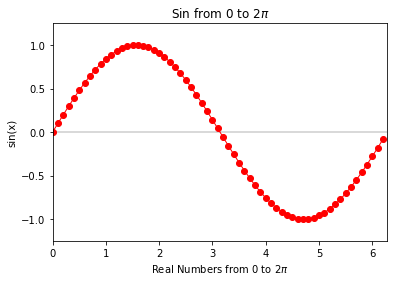

In [13]:
# DATASET 2
x_lim = 2 * np.pi
x_axis = np.arange(0, x_lim, 0.1)
sin = np.sin(x_axis)

plt.title("Sin from 0 to 2$\pi$")
plt.xlabel("Real Numbers from 0 to 2$\pi$")
plt.ylabel("sin(x)")

plt.hlines(0, 0, x_lim, alpha=0.2)
plt.xlim(0, x_lim)
plt.ylim(-1.25, 1.25)

plt.plot(x_axis, sin, marker="o", color="red", linewidth=1)
plt.show()

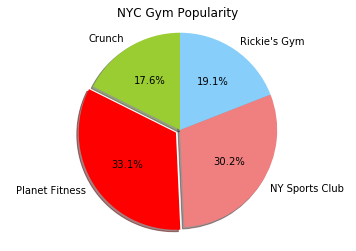

In [14]:
# DATASET 3
gyms = ["Crunch", "Planet Fitness", "NY Sports Club", "Rickie's Gym"]
members = [49, 92, 84, 53]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
explode = (0, 0.05, 0, 0)

plt.title("NYC Gym Popularity")
plt.pie(members, explode=explode, labels=gyms, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

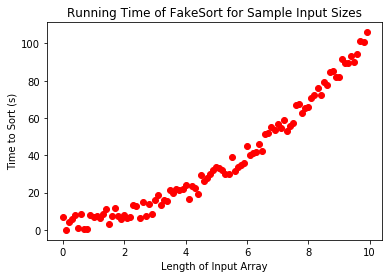

In [15]:
# DATASET 4
x_axis = np.arange(0, 10, 0.1)
times = []
for x in x_axis:
    times.append(x * x + np.random.randint(0, np.ceil(max(x_axis))))
    
plt.title("Running Time of FakeSort for Sample Input Sizes")
plt.xlabel("Length of Input Array")
plt.ylabel("Time to Sort (s)")

plt.scatter(x_axis, times, marker="o", color="red")
plt.show()


# Instructor Turn Activity 2: Pandas Plot 

In [7]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Using MatplotLib to Chart a DataFrame

In [23]:
# Load in csv
rain_df = pd.read_csv("Resources/avg_rain_state.csv")
rain_df.head()

,State,Inches,Milli­metres,Rank
0,Alabama,58.3,1480,4
1,Alaska,22.5,572,39
2,Arizona,13.6,345,47
3,Arkansas,50.6,1284,8
4,California,22.2,563,40


In [24]:
# Set x axis and tick locations
x_axis = np.arange(len(rain_df))
tick_locations = [value for value in x_axis]

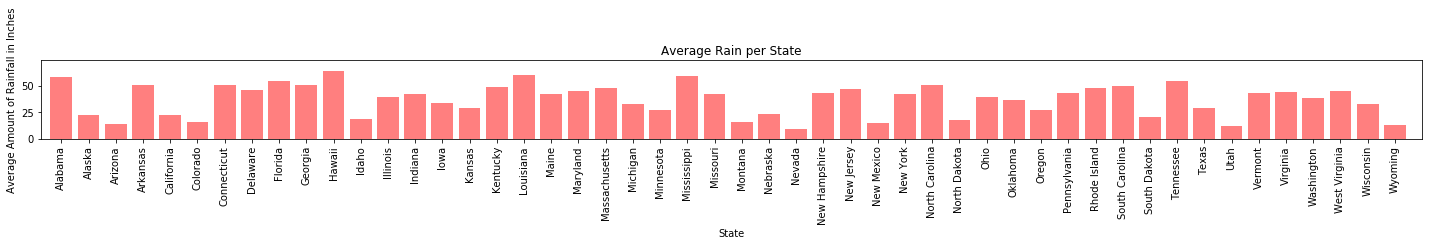

In [25]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, rain_df["State"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(rain_df["Inches"])+10)

# Set a Title and labels
plt.title("Average Rain per State")
plt.xlabel("State")
plt.ylabel("Average Amount of Rainfall in Inches")

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Images/avg_state_rain.png")
plt.show()

# Using Pandas to Chart a DataFrame

In [27]:
# Filter the DataFrame down only to those columns to chart
state_and_inches = rain_df[["State","Inches"]]

# Set the index to be "State" so they will be used as labels
state_and_inches = state_and_inches.set_index("State")

state_and_inches.head()

,Inches
State,
Alabama,58.3
Alaska,22.5
Arizona,13.6
Arkansas,50.6
California,22.2


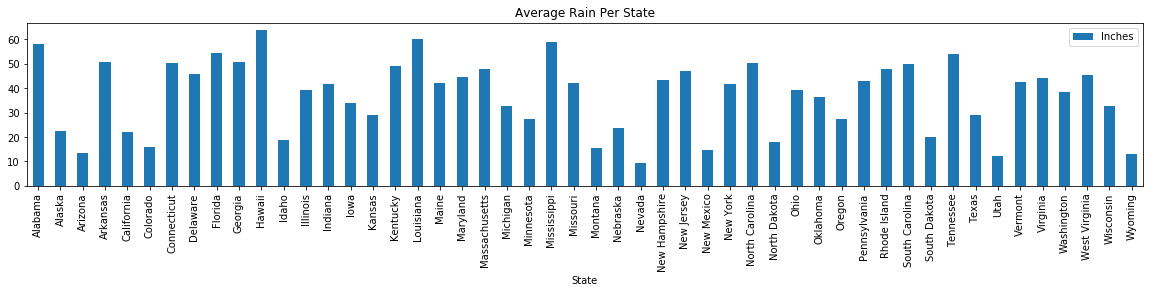

In [28]:
# Use DataFrame.plot() in order to create a bar chart of the data
state_and_inches.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average Rain Per State")

plt.show()

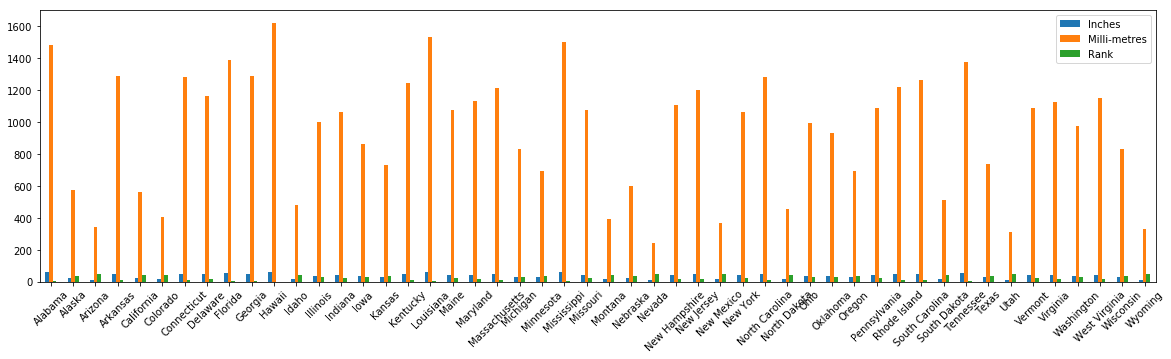

In [29]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = rain_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(rain_df["State"], rotation=45)

plt.show()

# Students Turn Activity 3: BattlingKings Plotting Pandas Data 

## Instructions

Your task is to plot the _total_ number of battles each king in the Game of Thrones data set participated in. In other words, you need to determine how many times each king started a battle, _and_ how many times they were defenders.

* Use Pandas to load the `got.csv` data set.

* Create a Series containing the number of times each king was an attacker.

* Create a Series containing the number of times each king was a defender.

* Combine these two variables into a single Series. _Hint_: How should you combine these two Series? Can you add Series in Pandas?

* Use your combined data to retrieve labels for your x-ticks.

* Create a red bar chart, and set its x-tick labels appropriately.

* Add a title and labels to your plot.

* Display your plot. Who participated in the most battles? The least?

In [21]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
# Read CSV
got_data = pd.read_csv("Resources/got.csv")
got_data

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,...,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


In [34]:
# Get attacker and defender data
attacker_data = got_data["attacker_king"].value_counts()
defender_data = got_data["defender_king"].value_counts()

# Get total battle data
#battle_data = attacker_data.add(defender_data, fill_value=0)

# Configure plot and ticks
#battle_data.plot(kind="bar", facecolor="red")

# Set textual properties
#plt.title("The Bloodthirst of Kings")
#plt.ylabel("Number of Battles Participated In")
#plt.xlabel("King")

# Show plot
#plt.show()

# Instructor Turn Activity 4 Group Plots

In [35]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [36]:
# Import our data into pandas from CSV
used_string = 'Resources/used_cars.csv'
used_car_df = pd.read_csv(used_string)

used_car_df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,mercedes-benz,124,236842,1994,2000,81,None,man,None,None,gasoline,2015-12-13 13:59:29.155164+00,2015-12-28 03:51:00.703842+00,3200.37
1,bmw,m3,199000,1993,1995,85,None,man,None,None,gasoline,2015-12-13 13:59:29.184036+00,2016-02-11 03:22:38.221928+00,1300.15
2,skoda,fabia,0,2004,1197,66,None,man,4,5,gasoline,2015-12-13 13:59:29.213434+00,2016-02-11 14:41:20.698835+00,14991.67
3,audi,a8,201000,2008,1200,47,None,man,None,None,gasoline,2015-12-13 13:59:29.237329+00,2016-02-11 03:22:39.656896+00,15501.74
4,opel,zafira,230000,2003,2172,92,None,man,4,7,diesel,2015-12-13 13:59:29.263377+00,2015-12-16 03:19:12.161469+00,1500.19
5,honda,civic,96000,1998,1396,66,None,man,4,5,gasoline,2015-12-13 13:59:29.3276+00,2015-12-16 03:19:12.222902+00,2200.26
6,nissan,note,65959,2006,1386,65,None,man,4,5,gasoline,2015-12-13 13:59:29.367914+00,2015-12-18 23:19:56.322226+00,4570.50
7,opel,zafira,164000,2006,1910,88,None,auto,4,7,diesel,2015-12-13 13:59:29.402203+00,2015-12-21 22:48:31.028456+00,5900.67
8,hyundai,NaN,155000,2007,1900,88,None,man,None,None,gasoline,2015-12-13 13:59:29.460842+00,2015-12-15 04:32:52.821758+00,2800.30
9,ford,focus,252000,2004,1753,74,None,man,4,5,diesel,2015-12-13 13:59:29.488079+00,2016-02-11 03:22:40.023928+00,1950.22


In [37]:
# Create a group based on the values in the 'maker' column
maker_group = used_car_df.groupby('maker')

# Count how many times each maker appears in our group
count_makers = maker_group['manufacture_year'].count()

count_makers

maker
audi              6
bmw              11
chevrolet         1
citroen           1
fiat              2
ford              4
honda             1
hyundai           1
kia               3
mazda             1
mercedes-benz     5
mitsubishi        1
nissan            2
opel              2
seat              1
skoda             5
suzuki            1
toyota            1
volvo             1
Name: manufacture_year, dtype: int64

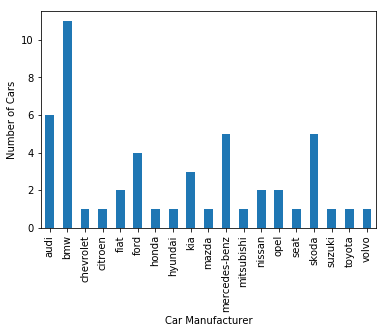

In [38]:
# Create a bar chart based off of the group series from before
count_chart = count_makers.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Car Manufacturer")
count_chart.set_ylabel("Number of Cars")


plt.show()

# Students Turn Activity 5: Bike Trippin

## Instructions

* Create a bar chart using Pandas and MatplotLib that visualizes how many individual bike trips were taken by each gender.

* Create a pie graph using Pandas and MatplotLib that can be used to visualize the trip duration of a single bike split up by gender.

## Hint

* There is a buggy value stored within the "gender" column of the original DataFrame. In order to create an accurate chart, this value will need to be found and removed.

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Import our data into pandas from CSV
string_thing = 'Resources/trip.csv'
bike_trips_df = pd.read_csv(string_thing)

bike_trips_df

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0
5,10/13/2014 10:47,SEA00337,808.805,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1974.0
6,10/13/2014 11:45,SEA00202,596.715,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1978.0
7,10/13/2014 11:45,SEA00311,592.131,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1983.0
8,10/13/2014 11:45,SEA00486,586.347,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Female,1974.0
9,10/13/2014 11:45,SEA00434,587.634,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1958.0


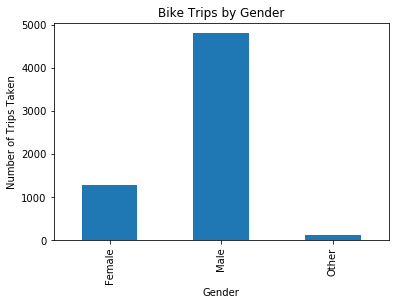

In [4]:
# Split up our data into groups based upon 'gender'
gender_groups = bike_trips_df.groupby('gender')

# Find out how many of each gender took bike trips
gender_trips = gender_groups['tripduration'].count()


# Drop the 'stoptime' row that is contained within our group
#gender_trips = gender_trips.drop(gender_trips.index[3])

# Chart our data, give it a title, and label the axes
gender_chart = gender_trips.plot(kind="bar", title="Bike Trips by Gender")
gender_chart.set_xlabel("Gender")
gender_chart.set_ylabel("Number of Trips Taken")

plt.show()

In [60]:
# Split up our data into groups based upon 'bikeid' and 'gender'
#bike_groups = bike_trips_df.groupby(['bikeid','gender'])

# Create a new variable that holds the sum of our groups
#sum_it_up = bike_groups.sum()
#sum_it_up.head(12)

tripduration  birthyear
bikeid   gender                         
SEA00021 Female      4546.611    11861.0
         Male        6945.072    23714.0
SEA00022 Female       905.915     1988.0
         Male        3967.407    13851.0
SEA00023 Female      2668.341     7912.0
         Male        5867.946    13856.0
SEA00024 Male        5423.183    23751.0
SEA00025 Female     11328.693    21707.0
         Male       28542.524    39658.0
SEA00026 Female      1974.877     3968.0
         Male        4680.133    15861.0
         Other        691.920     1992.0

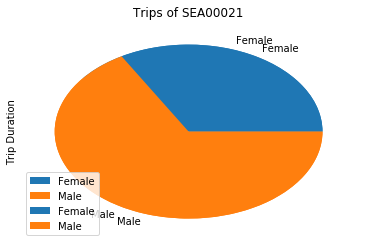

In [62]:
# Make a variable called bike_id and store a 'bikeid' in it
#bike_id = "SEA00021"

# Collect the trips of the 'bikeid' above
#just_one_bike = sum_it_up.loc[bike_id]

# Place the gender keys for that single bike into a list
#gender_list = just_one_bike.keys()

# Create a pie chart based upon the trip duration of that single bike
#bike_pie = just_one_bike.plot(kind="pie", y=gender_list, title=("Trips of " + bike_id))
#bike_pie.set_ylabel("Trip Duration")

#plt.show()

# Students Turn Activity 6 Miles Per Gallon

## Instructions

* Create a scatter plot using the data provided, Pandas, and MatplotLib which compares the MPG of a vehicle with its horsepower.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
car_data = pd.read_csv('Resources/mpg.csv')
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [11]:
# Remove the rows with missing values in horsepower
car_data = car_data.loc[car_data['horsepower'] != "?"]
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [12]:
# Set the 'car name' as our index
car_data = car_data.set_index('car name')

# Remove the 'origin' column
del car_data['origin']

car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
car name,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70
buick skylark 320,15.0,8,350.0,165,3693,11.5,70
plymouth satellite,18.0,8,318.0,150,3436,11.0,70
amc rebel sst,16.0,8,304.0,150,3433,12.0,70
ford torino,17.0,8,302.0,140,3449,10.5,70


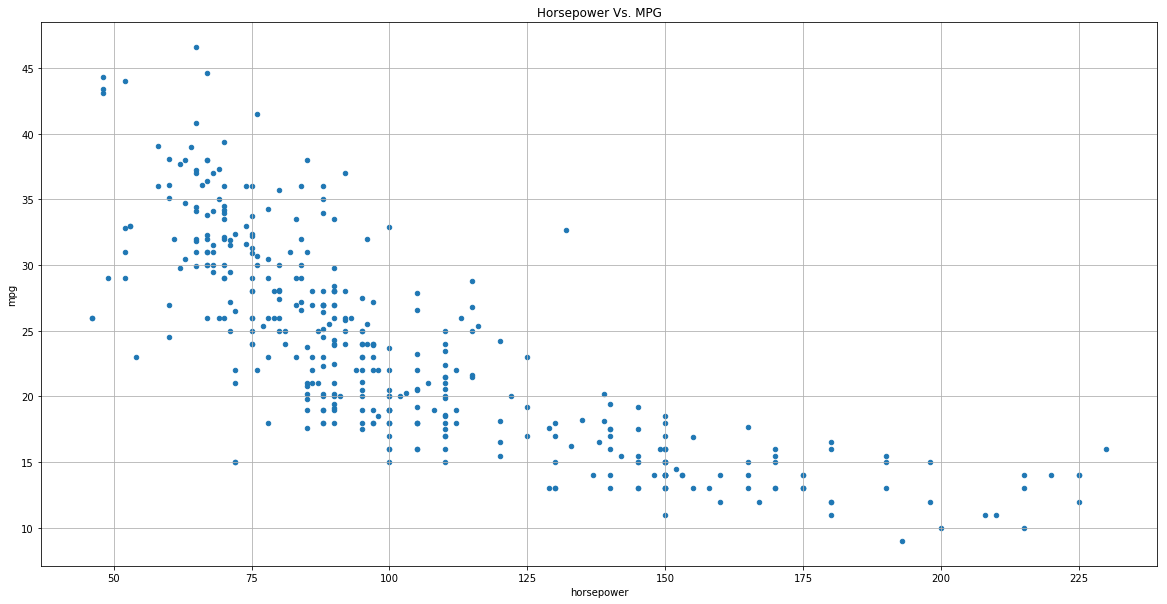

In [16]:
# Convert the "horsepower" column to numeric so the data can be used
car_data['horsepower'] = pd.to_numeric(car_data['horsepower'])
# Create a scatter plot which compares MPG to horsepower
car_data.plot(kind="scatter", x="horsepower", y="mpg", grid=True, figsize=(20,10),
              title="Horsepower Vs. MPG")
plt.show()

# Instructor Turn Activity 7: Pandas Mult Line unemploy chart

In [46]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [47]:
# Read CSV
unemployed_data_one = pd.read_csv("Resources/unemployment_2010-2011.csv")
unemployed_data_two = pd.read_csv("Resources/unemployment_2012-2014.csv")

# Merge our two data frames together
combined_unemployed_data = pd.merge(unemployed_data_one, unemployed_data_two, on="Country Name")
combined_unemployed_data.head()

,Country Name,Country Code_x,2010,2011,Country Code_y,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,AFG,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,AGO,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,ALB,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,ARB,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,ARE,9.800000,9.900000,10.000000


In [48]:
# Delete the duplicate 'Country Code' column and rename the first one back to 'Country Code'
del combined_unemployed_data['Country Code_y']
combined_unemployed_data = combined_unemployed_data.rename(columns={"Country Code_x":"Country Code"})
combined_unemployed_data.head()

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000


In [49]:
# Set the 'Country Code' to be our index for easy referencing of rows# Set t 
combined_unemployed_data = combined_unemployed_data.set_index("Country Code")

In [50]:
# Collect the mean unemployment rates for the world
average_unemployment = combined_unemployed_data.mean()

# Collect the years where data was collected
years = average_unemployment.keys()

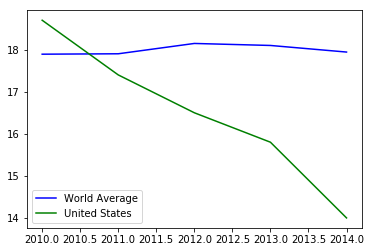

In [51]:
# Plot the world average as a line chart
world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# Plot the unemployment values for a single country
country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
                        color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# Create a legend for our chart
plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
plt.show()

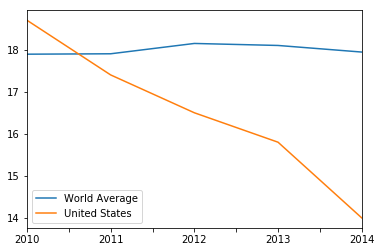

In [52]:
average_unemployment.plot(label="World Average")
combined_unemployed_data.loc['USA', "2010":"2014"].plot(label="United States")
plt.legend()
plt.show()

# Winnining Wrestlers Entertainment
#### In this activity you will be taking four seperate csvs that were scraped down from a wrestling database, merging them together, and then creating charts to visualize a wrestler's wins and losses over the course of four years.

## Students Turn Activity 8: Part 1 - Macho Merging
* You will likely need to perform three different merges over the course of this activity, changing the names of your columns as you go along.

In [53]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [61]:
# Bring each CSV into a separate data frame
wrestling_2013 = "Resources/WWE-Data-2013.csv"
wrestling_2014 = "Resources/WWE-Data-2014.csv"
wrestling_2015 = "Resources/WWE-Data-2015.csv"
wrestling_2016 = "Resources/WWE-Data-2016.csv"

wrestlers_2013_df = pd.read_csv(wrestling_2013)
wrestlers_2014_df = pd.read_csv(wrestling_2014)
wrestlers_2015_df = pd.read_csv(wrestling_2015)
wrestlers_2016_df = pd.read_csv(wrestling_2016)

In [62]:
# Merge the first two datasets (2013 and 2014) on "Wrestler" so that no data is lost (should be 182 rows)
combined_wrestlers_df = pd.merge(wrestlers_2013_df, wrestlers_2014_df,
                                 how='outer', on='Wrestler')
combined_wrestlers_df.head()

,Wrestler,Wins_x,Losses_x,Draws_x,Wins_y,Losses_y,Draws_y
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0


In [63]:
# Rename our _x columns to "2013 Wins", "2013 Losses", and "2013 Draws"
combined_wrestlers_df = combined_wrestlers_df.rename(columns={"Wins_x":"2013 Wins",
                                                              "Losses_x":"2013 Losses",
                                                              "Draws_x":"2013 Draws"})

# Rename our _y columns to "2014 Wins", "2014 Losses", and "2014 Draws"
combined_wrestlers_df = combined_wrestlers_df.rename(columns={"Wins_y":"2014 Wins",
                                                              "Losses_y":"2014 Losses",
                                                              "Draws_y":"2014 Draws"})

combined_wrestlers_df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0


In [64]:
# Merge our newly combined dataframe with the 2015 dataframe
combined_wrestlers_df = pd.merge(combined_wrestlers_df, wrestlers_2015_df, how="outer", on="Wrestler")
combined_wrestlers_df

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,Wins,Losses,Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0
5,Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0
6,Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0
7,Damien Sandow,39.0,147.0,3.0,3.0,113.0,0.0,50.0,9.0,2.0
8,Alberto Del Rio,126.0,53.0,4.0,31.0,82.0,1.0,26.0,13.0,2.0
9,Dolph Ziggler,62.0,117.0,1.0,134.0,60.0,2.0,115.0,52.0,2.0


In [65]:
# Rename "wins", "losses", and "draws" to "2015 Wins", "2015 Losses", and "2015 Draws"
combined_wrestlers_df = combined_wrestlers_df.rename(columns={"Wins":"2015 Wins","Losses":"2015 Losses","Draws":"2015 Draws"})

combined_wrestlers_df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0


In [66]:
# Merge our newly combined dataframe with the 2016 dataframe
combined_wrestlers_df = pd.merge(combined_wrestlers_df, wrestlers_2016_df, how="outer", on="Wrestler")
combined_wrestlers_df

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,Wins,Losses,Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,NaN,NaN,NaN
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0
5,Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0,142.0,12.0,5.0
6,Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0,37.0,17.0,1.0
7,Damien Sandow,39.0,147.0,3.0,3.0,113.0,0.0,50.0,9.0,2.0,11.0,18.0,0.0
8,Alberto Del Rio,126.0,53.0,4.0,31.0,82.0,1.0,26.0,13.0,2.0,24.0,65.0,2.0
9,Dolph Ziggler,62.0,117.0,1.0,134.0,60.0,2.0,115.0,52.0,2.0,114.0,56.0,2.0


In [67]:
# Rename "wins", "losses", and "draws" to "2016 Wins", "2016 Losses", and "2016 Draws"
combined_wrestlers_df = combined_wrestlers_df.rename(columns={"Wins":"2016 Wins","Losses":"2016 Losses","Draws":"2016 Draws"})

combined_wrestlers_df.head(10)

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,NaN,NaN,NaN
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0
5,Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0,142.0,12.0,5.0
6,Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0,37.0,17.0,1.0
7,Damien Sandow,39.0,147.0,3.0,3.0,113.0,0.0,50.0,9.0,2.0,11.0,18.0,0.0
8,Alberto Del Rio,126.0,53.0,4.0,31.0,82.0,1.0,26.0,13.0,2.0,24.0,65.0,2.0
9,Dolph Ziggler,62.0,117.0,1.0,134.0,60.0,2.0,115.0,52.0,2.0,114.0,56.0,2.0


## Students Turn Activity 9: Part 2 - Time to Calculate!
* When your tables have been merged together into one data frame, calculate the total number of wins, losses, and draws a wrestler has had over the course of their career. Also create a new column that will hold the total matches a wrestler has been in over the course of their career.

    *  You will need to convert all NaN values to a number so that you can perform these calculations
* We are only interested in those wrestlers who have been with the WWE from 2013 to 2016. You will need to come up with some way of filtering out rows that do not meet these conditions.

    * Also set the 'Wrestler' column as your key for easier referencing later on.

In [70]:
# Replace all NaN values with 0 
combined_wrestlers_df = combined_wrestlers_df.fillna(0)
# Create a new column called "Total Wins" and add up each wrestler's wins per year to fill in the values
combined_wrestlers_df["Total Wins"] = combined_wrestlers_df["2013 Wins"] + combined_wrestlers_df["2014 Wins"] + combined_wrestlers_df["2015 Wins"] + combined_wrestlers_df["2016 Wins"]

# Create a new column called "Total Losses" and add up each wrestler's losses per year to fill in the values
combined_wrestlers_df["Total Losses"] = combined_wrestlers_df["2013 Losses"] + combined_wrestlers_df["2014 Losses"] + combined_wrestlers_df["2015 Losses"] + combined_wrestlers_df["2016 Losses"]

# Create a new column called "Total Draws" and add up each wrestler's draws per year to fill in the values
combined_wrestlers_df["Total Draws"] = combined_wrestlers_df["2013 Draws"] + combined_wrestlers_df["2014 Draws"] + combined_wrestlers_df["2015 Draws"] + combined_wrestlers_df["2016 Draws"]

# Create a new column called "Total Matches" and add up the total wins, losses, and draws for each wrestler to fill in the values
combined_wrestlers_df["Total Matches"] = combined_wrestlers_df["Total Wins"] + combined_wrestlers_df["Total Losses"] + combined_wrestlers_df["Total Draws"]

combined_wrestlers_df

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,0.0,0.0,0.0,263.0,60.0,8.0,331.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,150.0,1.0,236.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0
5,Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0,142.0,12.0,5.0,496.0,199.0,21.0,716.0
6,Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0,37.0,17.0,1.0,321.0,253.0,7.0,581.0
7,Damien Sandow,39.0,147.0,3.0,3.0,113.0,0.0,50.0,9.0,2.0,11.0,18.0,0.0,103.0,287.0,5.0,395.0
8,Alberto Del Rio,126.0,53.0,4.0,31.0,82.0,1.0,26.0,13.0,2.0,24.0,65.0,2.0,207.0,213.0,9.0,429.0
9,Dolph Ziggler,62.0,117.0,1.0,134.0,60.0,2.0,115.0,52.0,2.0,114.0,56.0,2.0,425.0,285.0,7.0,717.0


In [71]:
# Create a new dataframe for those wrestlers who have wrestled at least 100 matches,
# have at least one win in 2013,
# and have at least one win in 2016
wrestled_over_hundred = combined_wrestlers_df.loc[(combined_wrestlers_df["Total Matches"] >= 100) &
                                                 (combined_wrestlers_df["2013 Wins"] > 0) &
                                                 (combined_wrestlers_df["2016 Wins"] > 0)]


# Set the index of this new dataframe to be the wrestlers names
wrestled_over_hundred = wrestled_over_hundred.set_index("Wrestler")

wrestled_over_hundred.head()

,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
Wrestler,,,,,,,,,,,,,,,,
Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0
Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0,142.0,12.0,5.0,496.0,199.0,21.0,716.0
Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0,37.0,17.0,1.0,321.0,253.0,7.0,581.0


## Students Turn Activity 10 Part 3 - Charting Careers
* Store an individual wrestler's wins over time in a variable
* Store that same wrestler's losses over time in a variable as well
* Create a line chart that will plot this wrestler's wins and losses from 2013 to 2016

In [80]:
# Collect the user's input to search through our data frame
wrestler_name = input("What wrestler's career would you like to look at?")

What wrestler's career would you like to look at?Dean Ambrose


In [81]:
# Create a series that looks for a wrestler by name and then traces their wins from 2013 to 2016
wins_over_time = wrestled_over_hundred.loc[wrestler_name,["2013 Wins","2014 Wins", "2015 Wins", "2016 Wins"]]

# Create a series that looks for a wrestler by name and then traces their losses from 2013 to 2016
losses_over_time = wrestled_over_hundred.loc[wrestler_name,["2013 Losses","2014 Losses",
                                                            "2015 Losses", "2016 Losses"]]


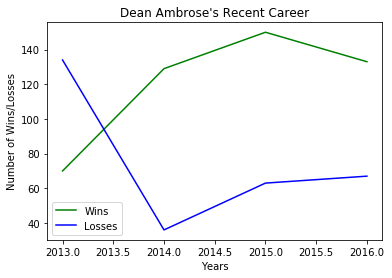

In [82]:
# Create a list of the years that we will use as our x axis
years = [2013,2014,2015,2016]

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, wins_over_time, color="green", label="Wins")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, losses_over_time, color="blue", label="Losses")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title(wrestler_name + "'s Recent Career")
plt.xlabel("Years")
plt.ylabel("Number of Wins/Losses")

# Print our chart to the screen
plt.show()